# Figure 2

In [1]:
from __future__ import division # no integer divisions
import warnings # library to manage warnings
warnings.filterwarnings('ignore') # supress warning
import numpy as np # library for numerical and matrix operations
import matplotlib.pyplot as plt # library for plotting
%matplotlib inline # show plots in the notebook

## Global parameters

In [2]:
N = 500 # number of firms
H = N*20 # number of workers
k = 3 # number of connections per node (degree)
T = 52 # number of time steps

## Useful functions

In [3]:
# this function takes a firm and perform the job search of each unemployed associated
def hirings(i, firms, unemps, nunemps, newHires):
    ## INPUTS:
    # i: firm id
    # firms: list of firms' ids
    # unemps: list of number of associated unemployed to each firm
    # nunemps: list of number of new unemployed associated to each firm
    # newHires: list of number of new hires of each firm
    
    cands = firms[firms!=i] # candidate firms to find a job are all except i
    n1 = unemps[i]
    if n1 > 0:
        firms2 = np.array(np.random.choice(cands, n1)) # each unemployed in firm i picks a candidate firm at random
        u1, u2 = np.unique(firms2, return_counts=True) # obtain a histogram of the candidate firms that were picked
        n3 = len(firms2)
        allocs = firms2[np.random.rand(n3) < hs[firms2]] # each candidate firm hires applicants according to their hiring policies hs
        if len(allocs) > 0:
            u1, u2 = np.unique(allocs, return_counts=True) # get histogram of firms who hired applicants from i
            newHires[u1] += u2 # update new hires
            unemps[i] -= np.sum(u2) # update i's specific unemployment (substract successful applicants)
    unemps[i] += nunemps[i] # update i's specific unemployment (add new unemployed)

    
# this function runs the model and returns a time series with the unemployment rate of the economy
def run(T):
    firms = np.arange(N) # vector with ids of firms
    sizes = np.zeros(N) # vector with the size of each firm
    unemps = np.zeros(N) # vector with the number of unemployed associated to each firm
    nunemps = np.zeros(N) # vector with the number of new unemployed associated to each firms (those that were just separated)
    newHires = np.zeros(N) # vector with the number of new employees of each firm
    unempRates = [] # stores the time series of the unemployment rate
    
    # initial condition of the model: all agents are unemployed and randomly assigned to firms
    u1, u2 = np.unique(np.random.randint(0, N, H), return_counts=True)
    unemps[u1] = u2
    
    # this is the main loop of the model
    for t in range(T):
        nunemps = np.random.binomial(sizes.astype(int), Lambda)
        sizes -= nunemps
        [hirings(firm, firms, unemps, nunemps, newHires) for firm in firms]
        sizes += newHires
        newHires[:] = 0
        unempRates.append(np.sum(unemps)/H)
    
    return unempRates


# mathematical solution for gobal search model
def uSolGlobal(k):
    return Lambda/(Lambda + np.mean(hs))

## Generate Beveridge Curves

In [4]:
Lambdas = [.05, .15, .25]
hss = [np.mean(np.min([np.random.rand(N)*scalar, np.ones(N)], 0)) for scalar in np.linspace(.01, 3, 100)]
UTS = []
HSS = []

# get analytical solutions for different separation rates
for Lambda in Lambdas:
    UT = []
    HS = []
    for hs in hss:
        UT.append(uSolGlobal(k))
        HS.append(np.mean(hs))
    UTS.append(UT)
    HSS.append(HS)

    
# run model for three parameterizations
series = []
theory = []
for Lambda in Lambdas:
    hs = np.min([np.random.rand(N)*2, np.ones(N)], 0)
    series.append(run(T))
    theory.append(uSolGlobal(k))

## Plot Results

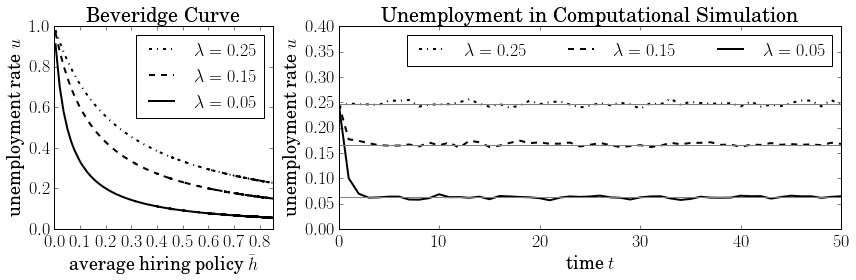

In [12]:
# plot results
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig, big_axes = plt.subplots(figsize=(12, 4) , nrows=1, ncols=3, sharey=True) 

ax1 = plt.subplot2grid((1,3), (0,0))
plt.plot(HSS[2], UTS[2], '-.k', linewidth=2)
plt.plot(HSS[1], UTS[1], '--k', linewidth=2)
plt.plot(HSS[0], UTS[0], '-k', linewidth=2)
plt.xlim([0, .85])
plt.legend([r'$\lambda=0.25$', r'$\lambda=0.15$', r'$\lambda=0.05$'], fontsize=18)
plt.ylabel(r'unemployment rate $u$', fontsize = 18)
plt.xlabel(r'average hiring policy $\bar{h}$', fontsize = 18)
plt.title(r'Beveridge Curve', fontsize = 20)
plt.tick_params(axis='x', which='major', labelsize=18)
plt.tick_params(axis='y', which='major', labelsize=18)

ax1 = plt.subplot2grid((1,3), (0,1), colspan=2)
plt.plot(series[2], '-.k', linewidth=2)
plt.plot(series[1], '--k', linewidth=2)
plt.plot(series[0], '-k', linewidth=2)
plt.plot(np.ones(T)*theory[2], '-', color='grey')
plt.plot(np.ones(T)*theory[1], '-', color='grey')
plt.plot(np.ones(T)*theory[0], '-', color='grey')
plt.legend([r'$\lambda=0.25$', r'$\lambda=0.15$', r'$\lambda=0.05$'], fontsize=18, ncol=3)
plt.ylabel(r'unemployment rate $u$', fontsize = 18)
plt.xlabel(r'time $t$', fontsize = 18)
plt.title(r'Unemployment in Computational Simulation', fontsize = 20)
plt.ylim([0, .4])
plt.xlim([0, 50])
plt.tick_params(axis='x', which='major', labelsize=18)
plt.tick_params(axis='y', which='major', labelsize=18)

plt.tight_layout()